In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(reshape2)
library(RColorBrewer)
library(gridExtra)
library(GGally)
library(e1071)

library(caret)
library(MASS)
library(pROC)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




# <center> Water Quality Analysis </center> 

<center> <img src="https://media.istockphoto.com/photos/analyzing-samples-picture-id182188515?k=6&m=182188515&s=612x612&w=0&h=Hcjly5YZGs4tFxPmD6Q-hbCKcoGFU-JIPT8qLaYDUOQ="> </center>

## About dataset

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. 
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
data <- read.csv("./water_potability.csv")

In [3]:
data

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.363817,62.79831,4.401425,0
NA,118.9886,14285.58,7.804174,268.6469,389.3756,12.706049,53.92885,3.595017,0


In [4]:
cat("Rows:", nrow(data), "Columns:", ncol(data), "\n")

Rows: 3276 Columns: 10 


In [5]:
print(colnames(data))

 [1] "ph"              "Hardness"        "Solids"          "Chloramines"    
 [5] "Sulfate"         "Conductivity"    "Organic_carbon"  "Trihalomethanes"
 [9] "Turbidity"       "Potability"     


In [6]:
summary(data)

       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:307.7   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 55.845  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:360.0   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 77.337  
 Max.   :481.0   Max.   :753.3   Max. 

In [7]:
str(data)

'data.frame':	3276 obs. of  10 variables:
 $ ph             : num  NA 3.72 8.1 8.32 9.09 ...
 $ Hardness       : num  205 129 224 214 181 ...
 $ Solids         : num  20791 18630 19910 22018 17979 ...
 $ Chloramines    : num  7.3 6.64 9.28 8.06 6.55 ...
 $ Sulfate        : num  369 NA NA 357 310 ...
 $ Conductivity   : num  564 593 419 363 398 ...
 $ Organic_carbon : num  10.4 15.2 16.9 18.4 11.6 ...
 $ Trihalomethanes: num  87 56.3 66.4 100.3 32 ...
 $ Turbidity      : num  2.96 4.5 3.06 4.63 4.08 ...
 $ Potability     : int  0 0 0 0 0 0 0 0 0 0 ...


In [8]:
colSums(is.na(data))

ph        Hardness          Solids     Chloramines         Sulfate 
            491               0               0               0             781 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
              0               0             162               0               0

In [9]:
sapply(data, n_distinct)

ph        Hardness          Solids     Chloramines         Sulfate 
           2786            3276            3276            3276            2496 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity      Potability 
           3276            3276            3115            3276               2

corrplot 0.95 loaded



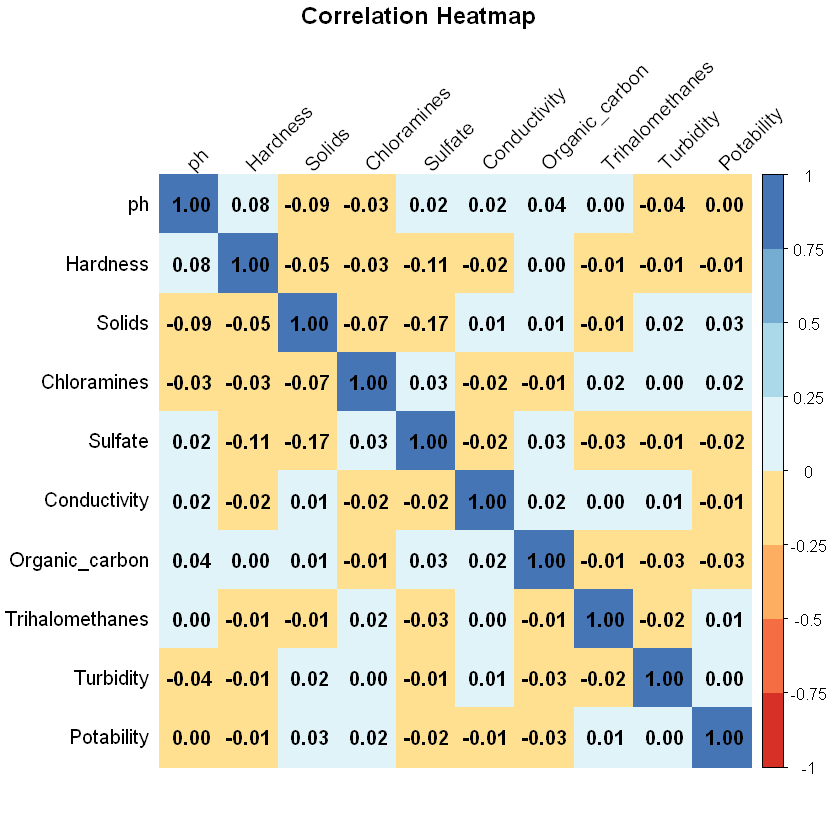

In [10]:
library(corrplot)

# Calculate the correlation matrix
cor_matrix <- cor(data, use = "pairwise.complete.obs")

# Create the heatmap
corrplot(cor_matrix, method = "color", addCoef.col = "black", 
         col = brewer.pal(n = 8, name = "RdYlBu"), 
         title = "\nCorrelation Heatmap", 
         tl.col = "black", tl.srt = 45)

In [11]:
cor_matrix <- cor(data, use = "pairwise.complete.obs")
cor_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000000,0.08209641,-0.089288250,-0.034349865,0.01820310,0.018614210,0.04350334,0.003354170,-0.039056666,-0.003556462
Hardness,0.082096407,1.00000000,-0.046899365,-0.030054239,-0.10692345,-0.023914600,0.00361004,-0.013013216,-0.014449129,-0.013836558
Solids,-0.089288250,-0.04689937,1.000000000,-0.070147580,-0.17180427,0.013830898,0.01024234,-0.009143253,0.019546144,0.033743313
Chloramines,-0.034349865,-0.03005424,-0.070147580,1.000000000,0.02724427,-0.020486409,-0.01265347,0.017084026,0.002363321,0.023778972
Sulfate,0.018203101,-0.10692345,-0.171804275,0.027244272,1.00000000,-0.016120564,0.03083117,-0.030274062,-0.011186961,-0.023577040
Conductivity,0.018614210,-0.02391460,0.013830898,-0.020486409,-0.01612056,1.000000000,0.02096636,0.001285236,0.005798168,-0.008128320
Organic_carbon,0.043503341,0.00361004,0.010242343,-0.012653471,0.03083117,0.020966361,1.00000000,-0.013274179,-0.027308113,-0.030001367
Trihalomethanes,0.003354170,-0.01301322,-0.009143253,0.017084026,-0.03027406,0.001285236,-0.01327418,1.000000000,-0.022144967,0.007130401
Turbidity,-0.039056666,-0.01444913,0.019546144,0.002363321,-0.01118696,0.005798168,-0.02730811,-0.022144967,1.000000000,0.001580682
Potability,-0.003556462,-0.01383656,0.033743313,0.023778972,-0.02357704,-0.008128320,-0.03000137,0.007130401,0.001580682,1.000000000


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


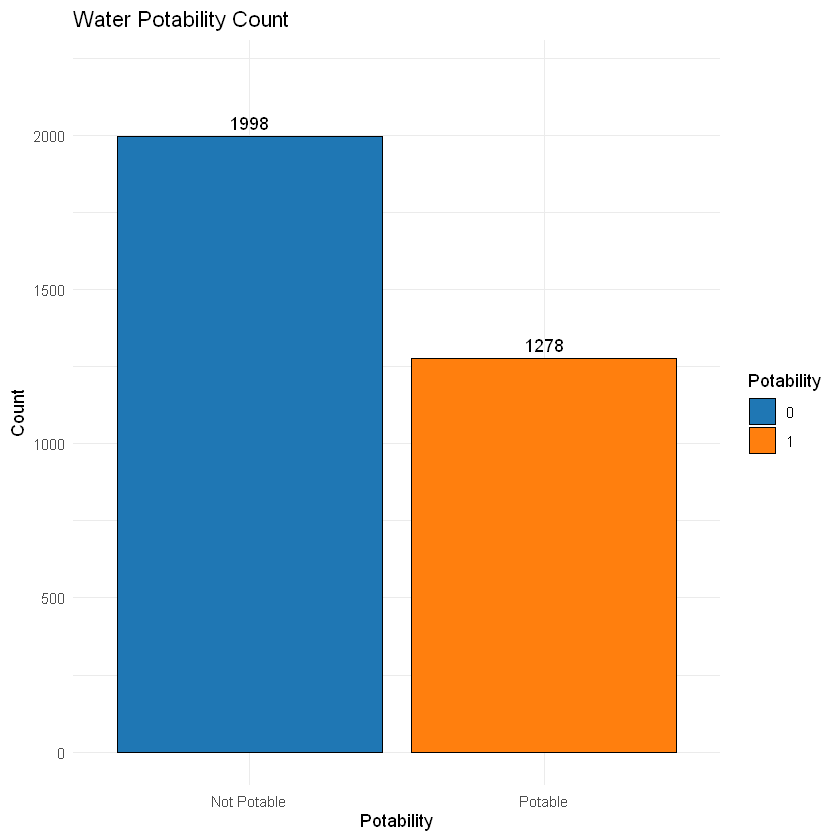

In [12]:
# Create the count plot for Potability with counts displayed
ggplot(data, aes(x = factor(Potability))) +
  geom_bar(aes(fill = factor(Potability)), color = "black") +
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e"), name = "Potability") +
  scale_x_discrete(labels = c("0" = "Not Potable", "1" = "Potable")) +
  labs(title = "Water Potability Count", x = "Potability", y = "Count") +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +  
  theme_minimal() +
  ylim(0, 2200)

Warning message:
"Removed 491 rows containing non-finite outside the scale range (`stat_ydensity()`)."


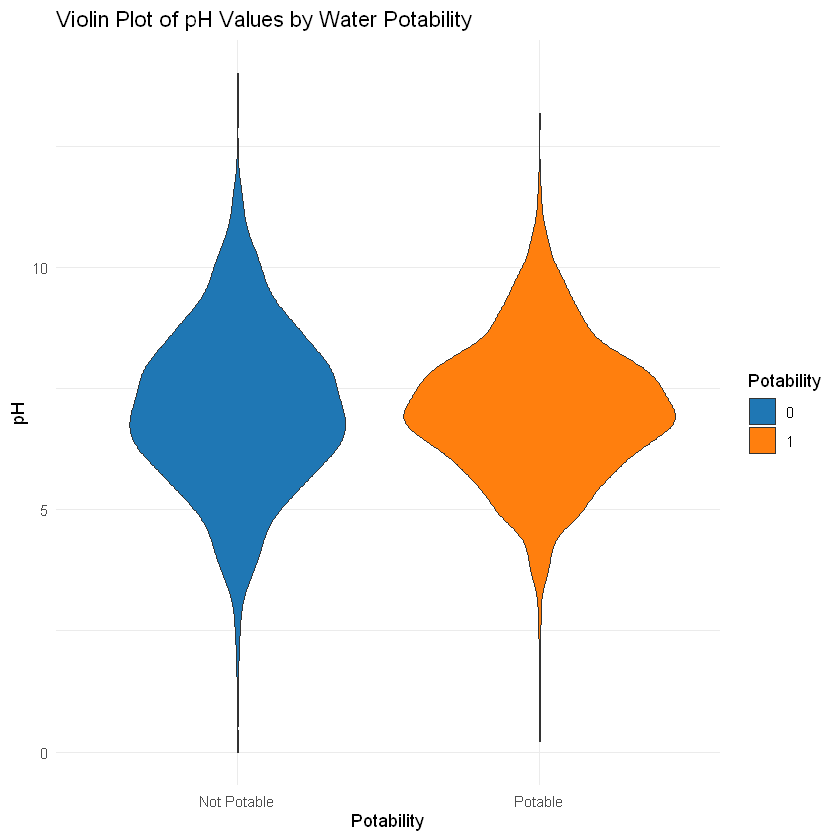

In [13]:
# Create the violin plot for pH values grouped by Potability
ggplot(data, aes(x = factor(Potability), y = ph, fill = factor(Potability))) +
  geom_violin(trim = TRUE) +  # Use trim = TRUE to avoid extending tails
  scale_fill_manual(values = c("#1f77b4", "#ff7f0e"), name = "Potability") +  # Custom colors for the fill
  scale_x_discrete(labels = c("0" = "Not Potable", "1" = "Potable")) +
  labs(title = "Violin Plot of pH Values by Water Potability", x = "Potability", y = "pH") +
  theme_minimal()

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
Warning message:
"Removed 491 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 781 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 162 rows containing non-finite outside the scale range (`stat_bin()`)."


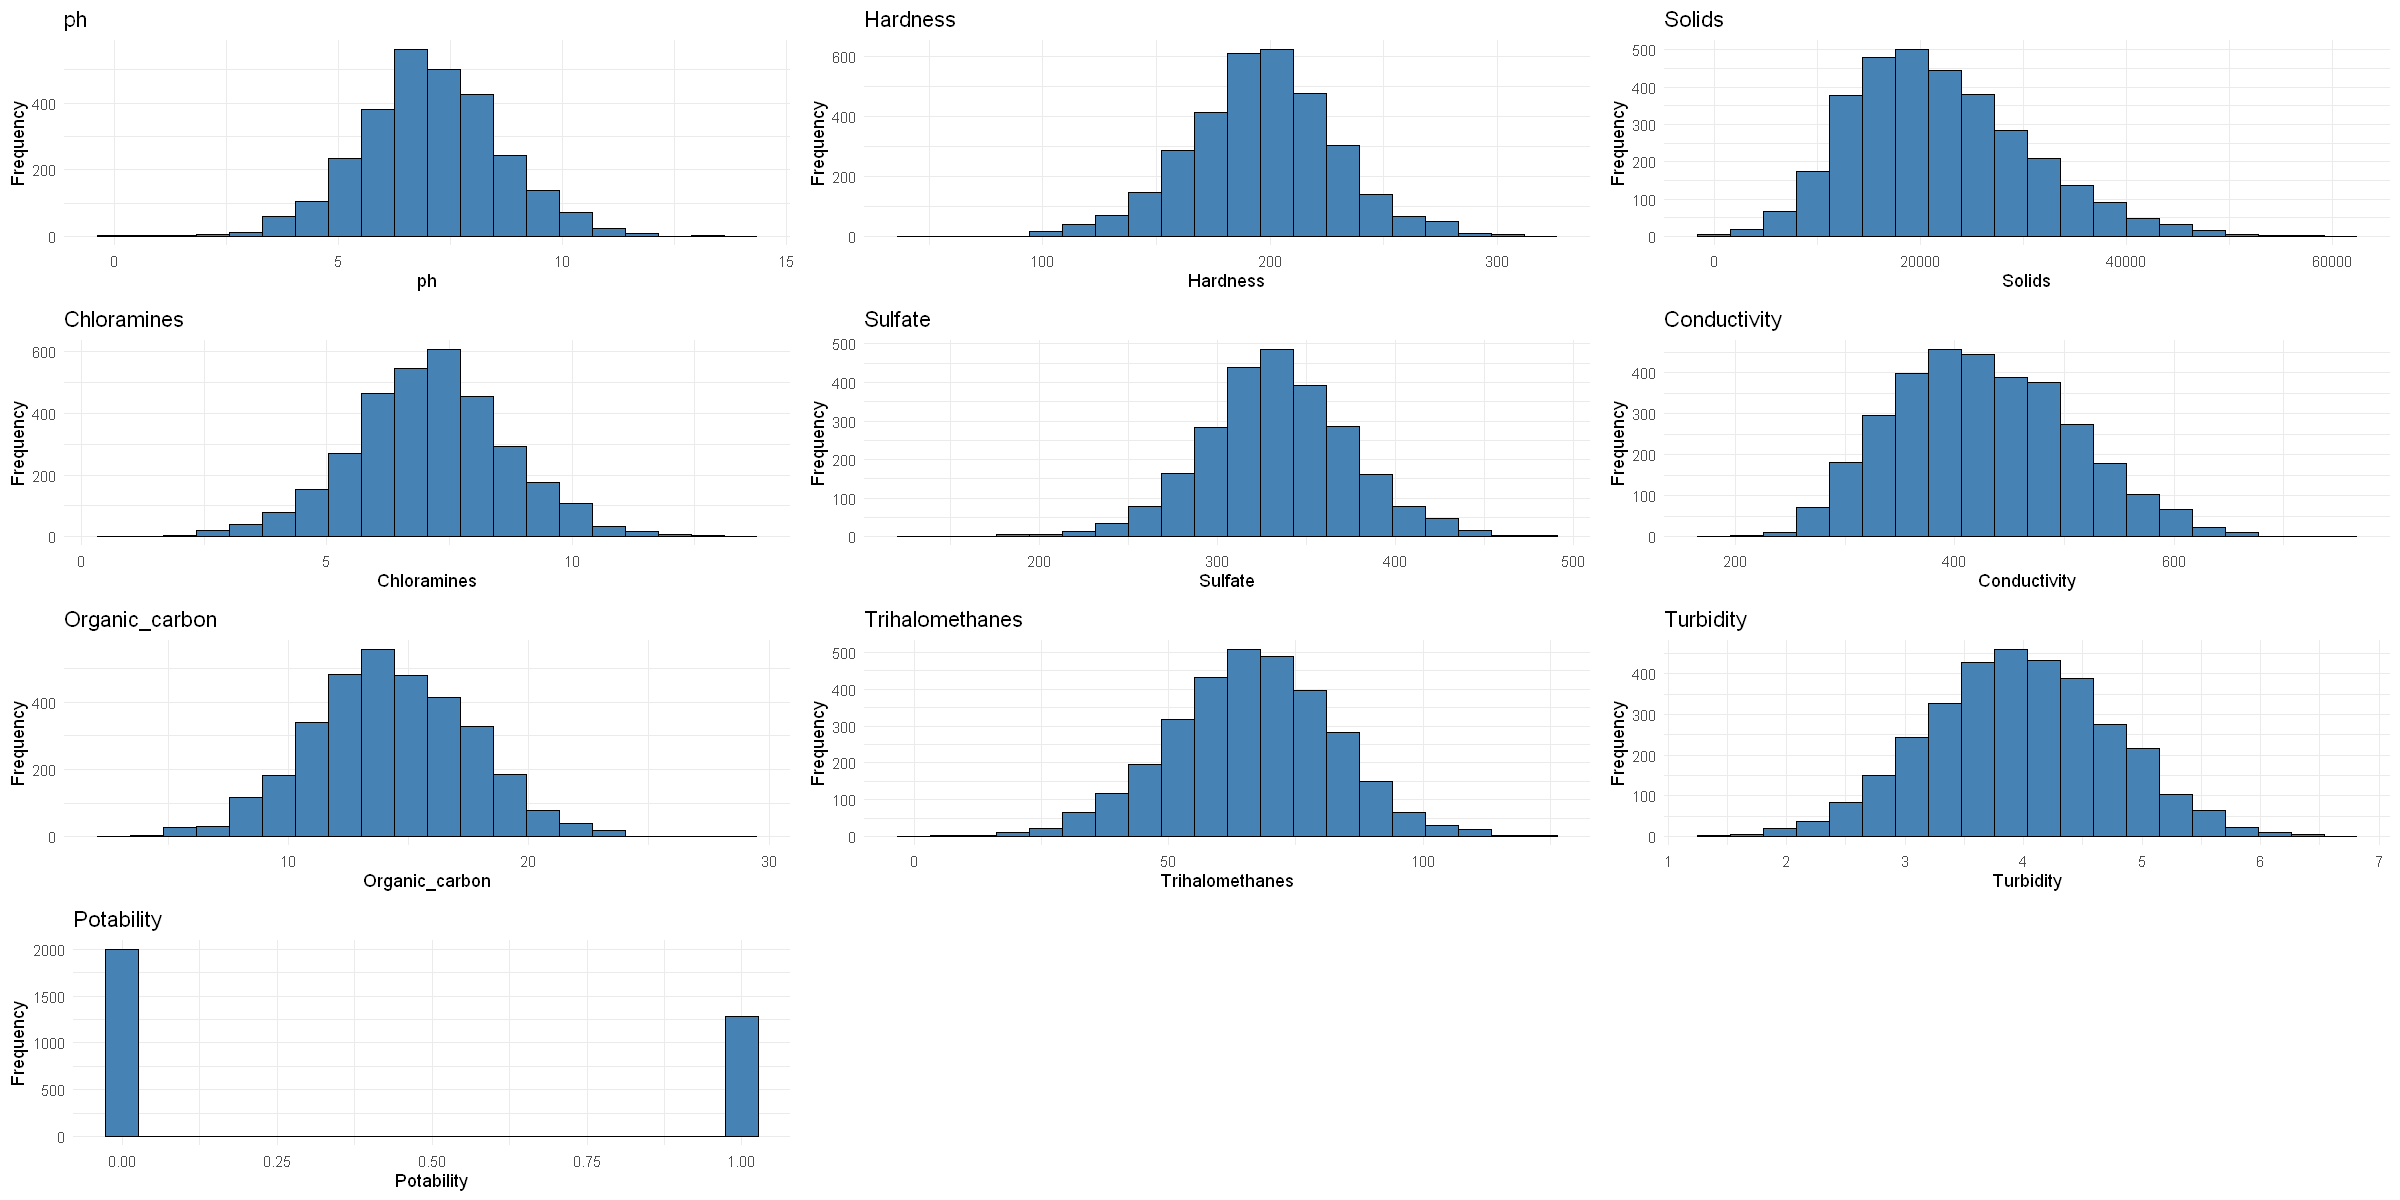

In [14]:
# Set plot size
options(repr.plot.width=20, repr.plot.height=10)

# Create a list to store plots
plots <- list()

# Loop through each column and create a histogram for each
for (col in names(data)) {
  # Create a histogram
  p <- ggplot(data, aes_string(x = col)) + 
    geom_histogram(bins = 20, fill = "steelblue", color = "black") + 
    labs(title = col, x = col, y = "Frequency") +
    theme_minimal()
  
  # Store the plot in the list
  plots[[col]] <- p
}

# Arrange and display all plots
do.call(grid.arrange, plots)

In [15]:
data_clean <- na.omit(data)

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation i

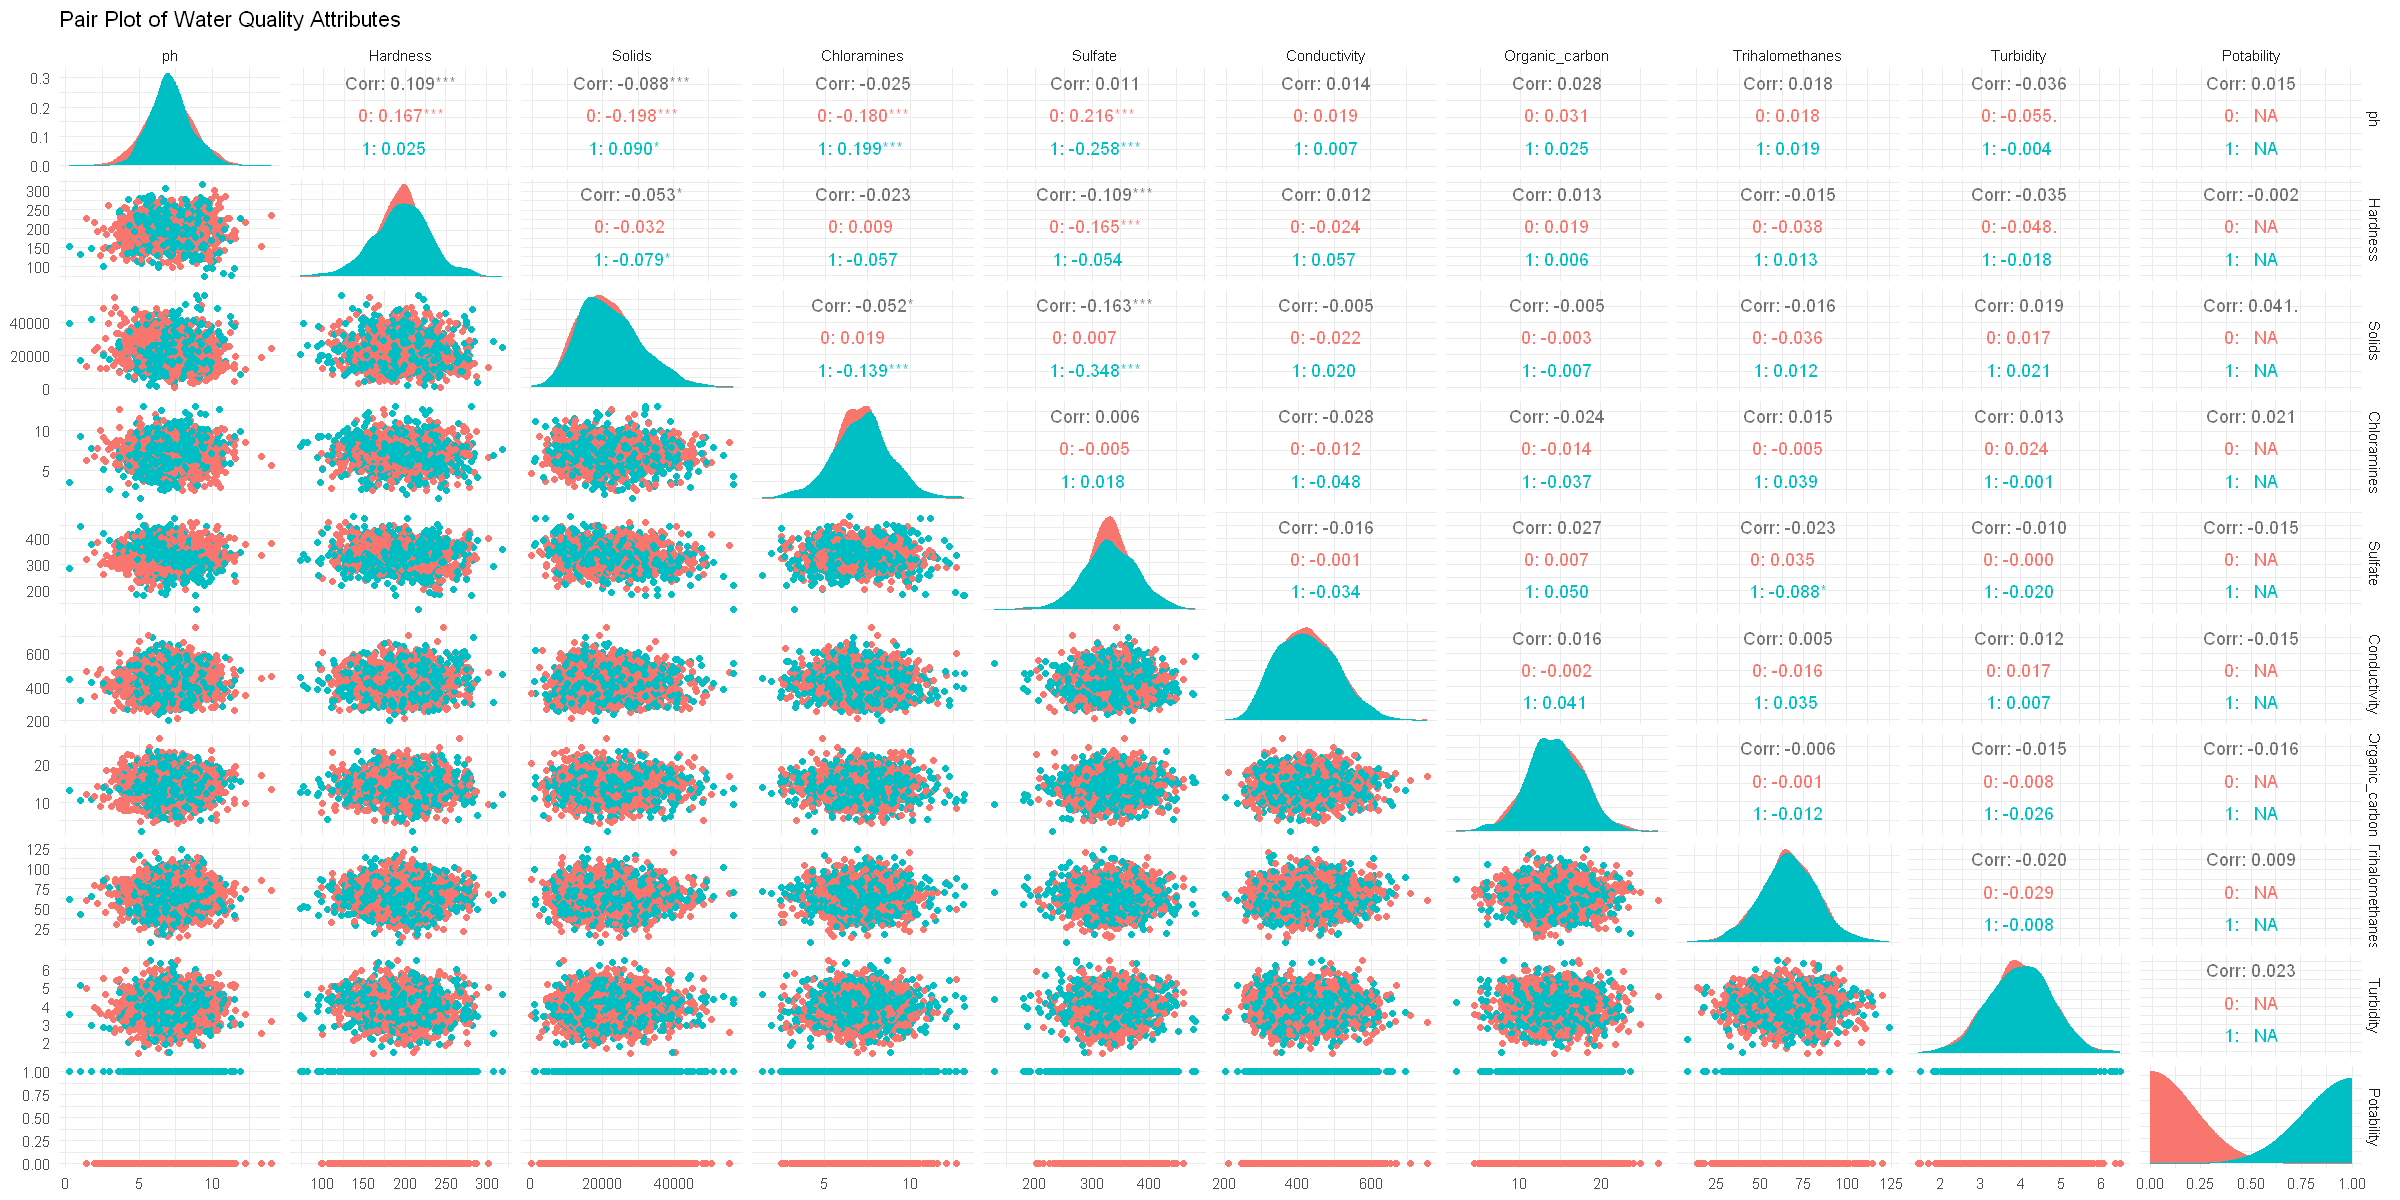

In [16]:
# Create a pair plot with ggpairs
ggpairs(data_clean, 
        aes(color = factor(Potability), fill = factor(Potability)),  # Set color by Potability
        title = "Pair Plot of Water Quality Attributes") +
  theme_minimal()

In [17]:
# Calculate skewness
skew_val <- sapply(data_clean, skewness, na.rm = TRUE)
skew_val_sorted <- sort(skew_val, decreasing = TRUE)

# Display skewness values
print(skew_val_sorted)

         Solids      Potability    Conductivity              ph     Chloramines 
     0.59500535      0.39402568      0.26647085      0.04887379      0.01295693 
 Organic_carbon       Turbidity         Sulfate Trihalomethanes        Hardness 
    -0.01998781     -0.03300219     -0.04648827     -0.05134540     -0.08511031 


In [18]:
# Calculate kurtosis
kurt_val <- sapply(data_clean, kurtosis, na.rm = TRUE)

# Sort the kurtosis values in descending order
kurt_val_sorted <- sort(kurt_val, decreasing = TRUE)

# Display the sorted kurtosis values
print(kurt_val_sorted)

        Sulfate              ph     Chloramines        Hardness          Solids 
     0.77859915      0.61497853      0.54366684      0.51941063      0.33787097 
Trihalomethanes  Organic_carbon       Turbidity    Conductivity      Potability 
     0.21787868      0.02638812     -0.05510014     -0.24466795     -1.84566080 


## Training Model

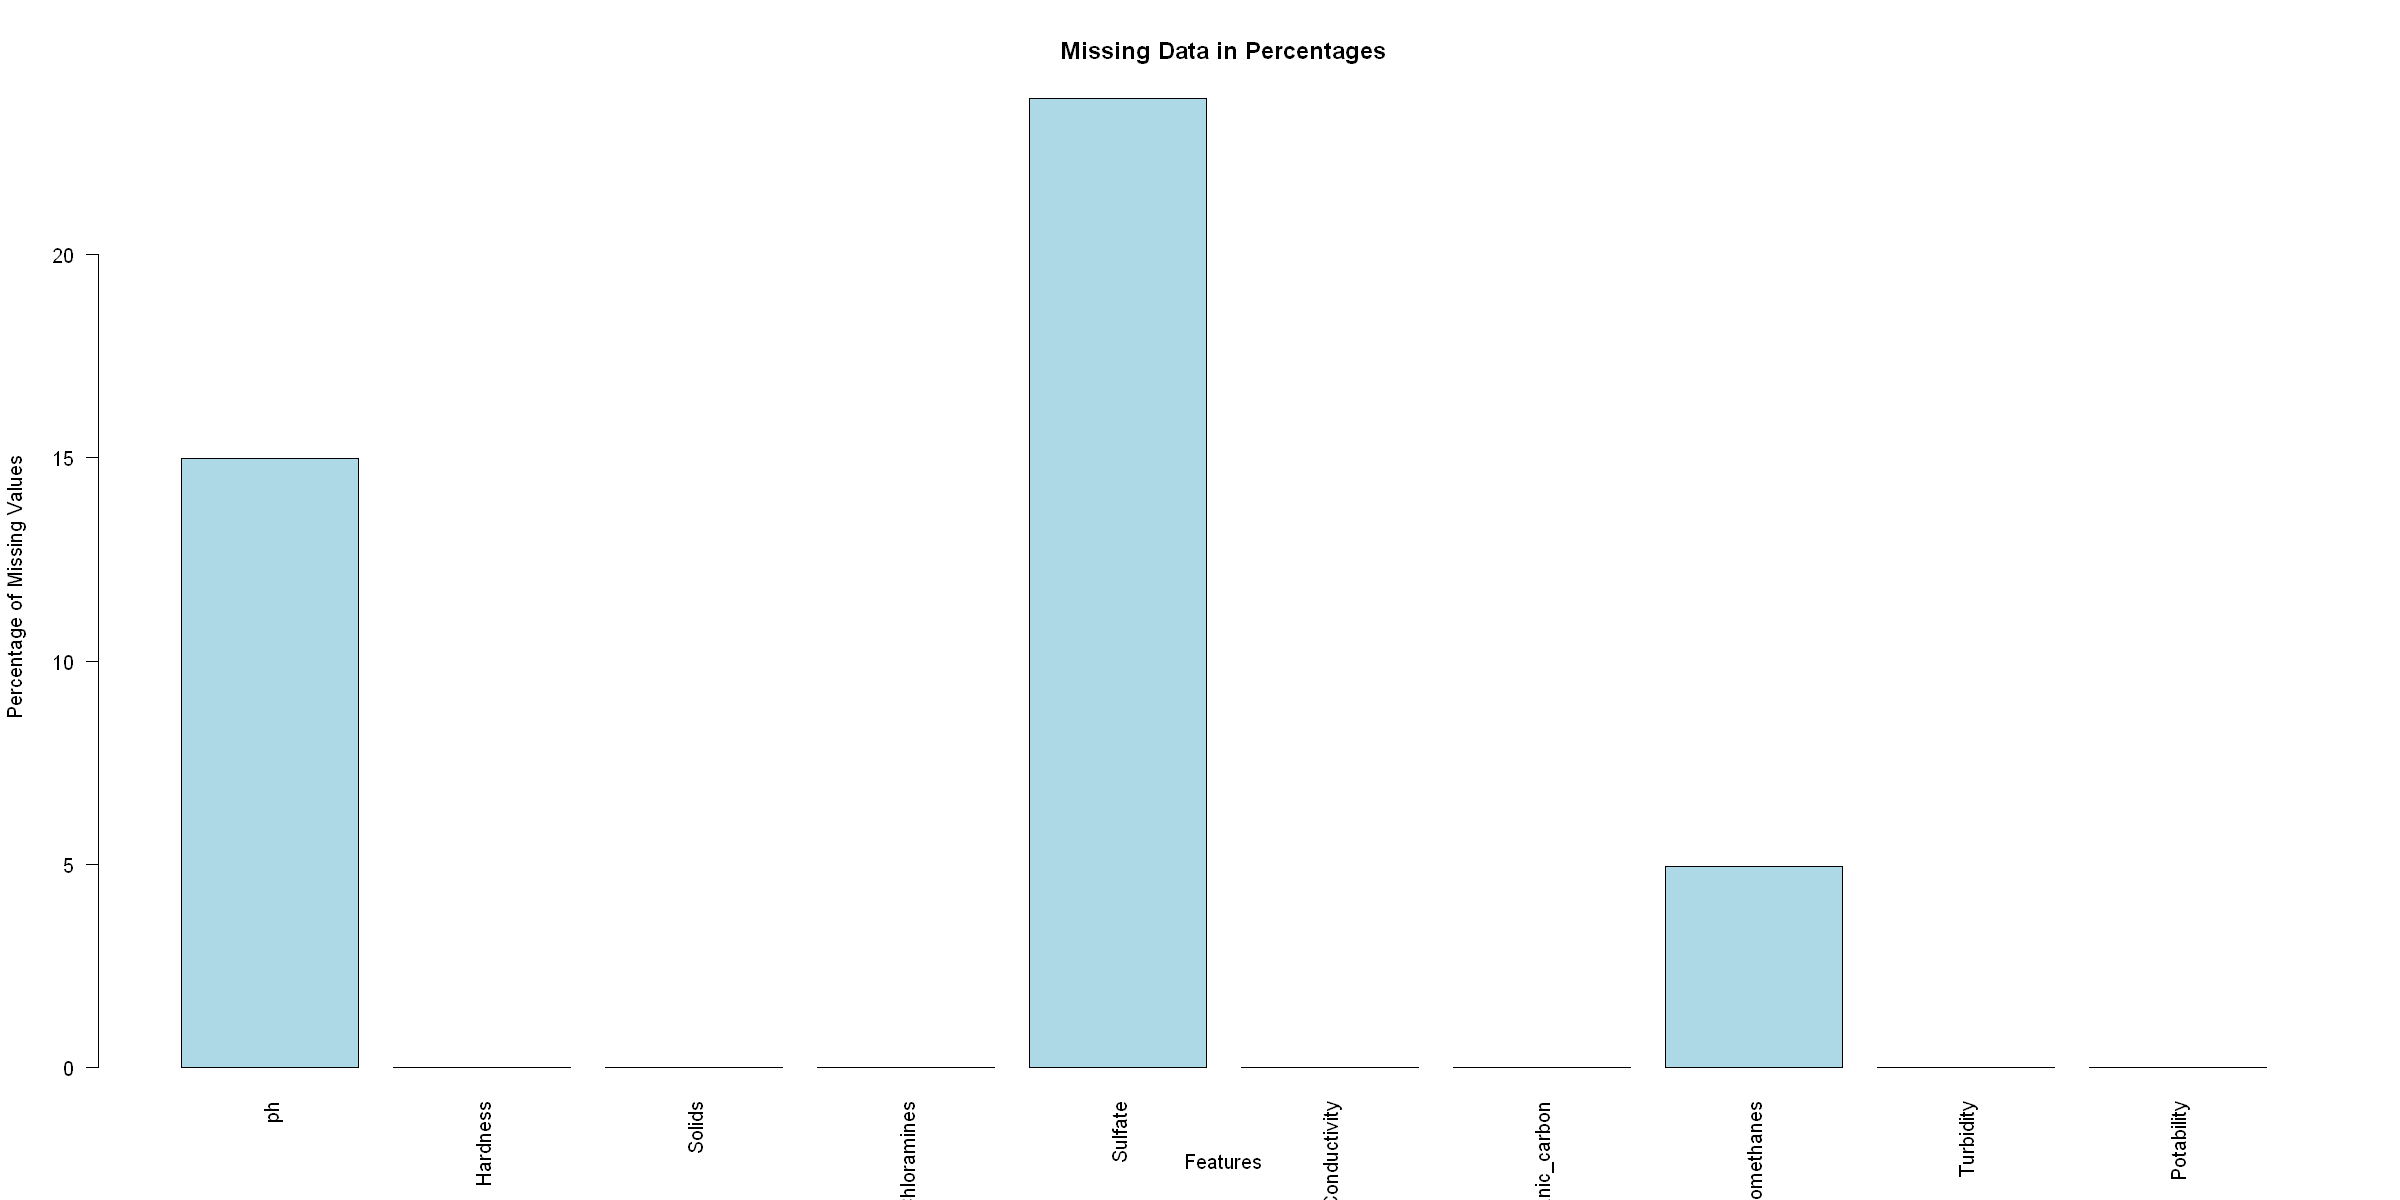

In [19]:
# Calculate and plot percentage of missing values
missing_values <- colSums(is.na(data)) / nrow(data) * 100
barplot(missing_values, 
        main = "Missing Data in Percentages", 
        ylab = "Percentage of Missing Values", 
        xlab = "Features", 
        col = "lightblue",
        las = 2)

In [20]:
# Fill missing values with mean
data$ph <- ifelse(is.na(data$ph), mean(data$ph, na.rm = TRUE), data$ph)
data$Sulfate <- ifelse(is.na(data$Sulfate), mean(data$Sulfate, na.rm = TRUE), data$Sulfate)
data$Trihalomethanes <- ifelse(is.na(data$Trihalomethanes), mean(data$Trihalomethanes, na.rm = TRUE), data$Trihalomethanes)

In [21]:
# Prepare features and target variable
X <- data[, !(names(data) %in% "Potability")]
y <- data$Potability

# Scaling the features
X_scaled <- scale(X)

# Splitting the dataset into training and test sets
set.seed(42)  # For reproducibility
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X_scaled[train_index, ]
X_test <- X_scaled[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

In [22]:
# Training the logistic regression model
log_reg <- glm(Potability ~ ., data = data, family = binomial, weights = ifelse(y == 1, 1, 1/length(y)))

# Get predictions
y_prob <- predict(log_reg, newdata = data, type = "response")
y_pred <- ifelse(y_prob >= 0.6, 1, 0)

# Calculate accuracy
accuracy <- mean(y_pred == y)
print(paste("Accuracy:", round(accuracy, 2)))

[1] "Accuracy: 0.39"


In [23]:
# Print classification report
confusion_matrix <- table(y, y_pred)
print(confusion_matrix)
print(confusionMatrix(as.factor(y_pred), as.factor(y)))

   y_pred
y      1
  0 1998
  1 1278


Warning message in confusionMatrix.default(as.factor(y_pred), as.factor(y)):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0    0    0
         1 1998 1278
                                          
               Accuracy : 0.3901          
                 95% CI : (0.3734, 0.4071)
    No Information Rate : 0.6099          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.3901          
             Prevalence : 0.6099          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        